## IPL (2008 - 2020)
### Author: Neel Patel
- EDA on the IPL stats from 2008 to 2020
- Player Dashboards and Match Stats

In [535]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

### Data Imports

In [536]:
matches = pd.read_csv("./data/matches.csv", parse_dates=["date"])
matches["year"] = matches.date.dt.to_period("y")
ball = pd.read_csv("./data/ball_by_ball.csv")

### Helper Functions

In [537]:
def getPlayerStats(player_name, data):
    """returns the stats for the player from 2008 - 2020

    Args:
        player_name (str): the name of the player
        data (pd.DataFrame): the dataframe from which data will be used

    Returns:
        list: list containing total runs sored, fours, sixes, dissmisals, balls_faced, runs in innings 1, runs in innings 2
    """
    runs = fours = sixes = dismissals = balls_faced = innings_1 = innings_2 = 0

    try:
        temp = data[data["batsman"] == player_name]
        runs = temp.batsman_runs.sum()
        innings_1 = temp.groupby("inning")["batsman_runs"].sum()[1]
        innings_2 = temp.groupby("inning")["batsman_runs"].sum()[2]
        fours = temp.batsman_runs.value_counts()[4]
        sixes = temp.batsman_runs.value_counts()[6]
        dissmisals = data.player_dismissed.value_counts()[player_name]
        balls_faced = temp.shape[0]

    except Exception as e:
        print("****** An exception occured the values for that stat will be 0")
        print(f"The following exception occured: {e}")
    
    return [runs, fours, sixes, dissmisals, balls_faced, innings_1, innings_2]


### Plot Helper Functions

In [538]:
def generatePlot(player_name, player_image, data):
    """Generates a player dashboard

    Args:
        player_name (str): the player's name
        player_image (str): player's image file name
        data (pd.DataFrame): the dataframe from which data will be referred
    
    """

    image_path =  "./player_images/"

    # getPlayerStats
    stats = getPlayerStats(player_name=player_name, data=data)

    # creating the dashboard
    plt.style.use("seaborn")
    plt.tight_layout()
    fig = plt.figure()
    text = f"{player_name} in the IPL (2008 to 2020)"
    fig.suptitle(t=text, x=.7, y=1.7, fontsize=14, fontweight="bold")
    
    ax1 = fig.add_axes([0,0,.7,1])
    ax2 = fig.add_axes([0.8, 0, .7, 1])
    ax3 = fig.add_axes([0, 1.1, .7, 0.5])
    ax4 = fig.add_axes([0.8, 1.1, .7, 0.5])
    ax1.margins(x=.1,y=.1)
    ax2.margins(x=.1,y=.1)

    # player image
    plt.style.use("classic")
    ax3.axes.set_xticks([])
    ax3.axes.set_yticks([])
    temp_img = plt.imread(image_path + player_image)
    ax3.imshow(temp_img)

    # general stats
    ax4.axes.set_xticks([])
    ax4.axes.set_yticks([])
    ax4.axes.set_facecolor("white")
    ax4.text(0, 0.8, "Total Runs Scored: " + str(stats[0]), fontweight="bold", fontsize=12)
    ax4.text(0.05, 0.7, "- Innings 1: " +
             str(stats[5]), fontweight="bold", fontsize=12)
    ax4.text(0.05, 0.6, "- Innings 2: " +
             str(stats[6]), fontweight="bold", fontsize=12)

    ax4.text(0, 0.5, "Total Balls Faced: " +
             str(stats[4]), fontweight="bold", fontsize=12)
    ax4.text(0, 0.4, "Total Fours: " + str(stats[1]), fontweight="bold", fontsize=12)
    ax4.text(0, 0.3, "Total Sixes: " + str(stats[2]), fontweight="bold", fontsize=12)
    ax4.text(0, 0.2, "Total Dismissals: " + str(stats[3]), fontweight="bold", fontsize=12)
    ax4.set_title("General Stats (2008 - 2020)")

    # dismissals type
    values = data[data["player_dismissed"] ==
                  player_name]["dismissal_kind"].value_counts().values
    labels = data[data["player_dismissed"] ==
                  player_name]["dismissal_kind"].value_counts().index
    ax1.pie(values, labels=labels, autopct="%1.1f%%", shadow=False,
            startangle=180)
    ax1.set_title("Distribution of Dismissial Kind")

        

    # distribution of runs scored
    values = data[data["batsman"] == player_name]["batsman_runs"].value_counts().values
    labels = data[data["batsman"] ==
                  player_name]["batsman_runs"].value_counts().index


    colors = "#8333E9 #FF7FAE #FFC6BF #F9F7F1 #849DAB #F7D8BA".split(" ")

    ax2.pie(values, labels=labels, autopct="%1.1f%%", shadow=False,
            startangle=180, colors=colors)

    ax2.set_title("Distribution of Runs Scored Per Balls Faced")
    plt.style.use("default");

### Virat Kohli

<Figure size 800x550 with 0 Axes>

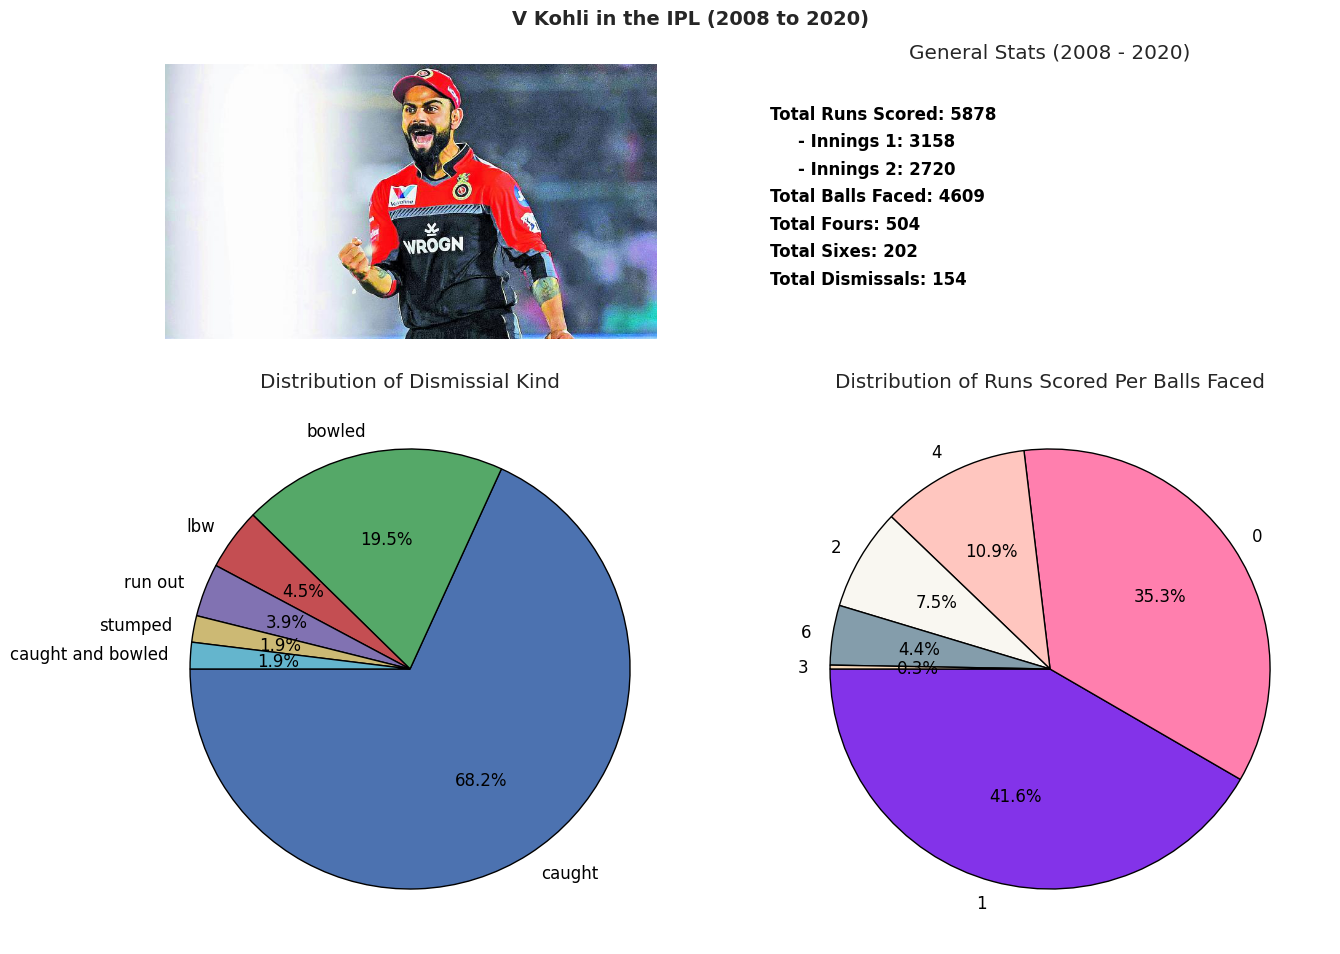

In [539]:
generatePlot("V Kohli", "v_kohli.jpeg", ball)

- Virat Kohli has scored no runs on ~ 35.3% balls faced roughly ~ 1627 dot balls faced 
- Almost 50% the balls he faced are singles, doubles and triple runs
- Want to get him out? Ask him to give a catch !!!
- Kohli, has scored more runs in the first innings of the game

### Rohit Sharma

<Figure size 800x550 with 0 Axes>

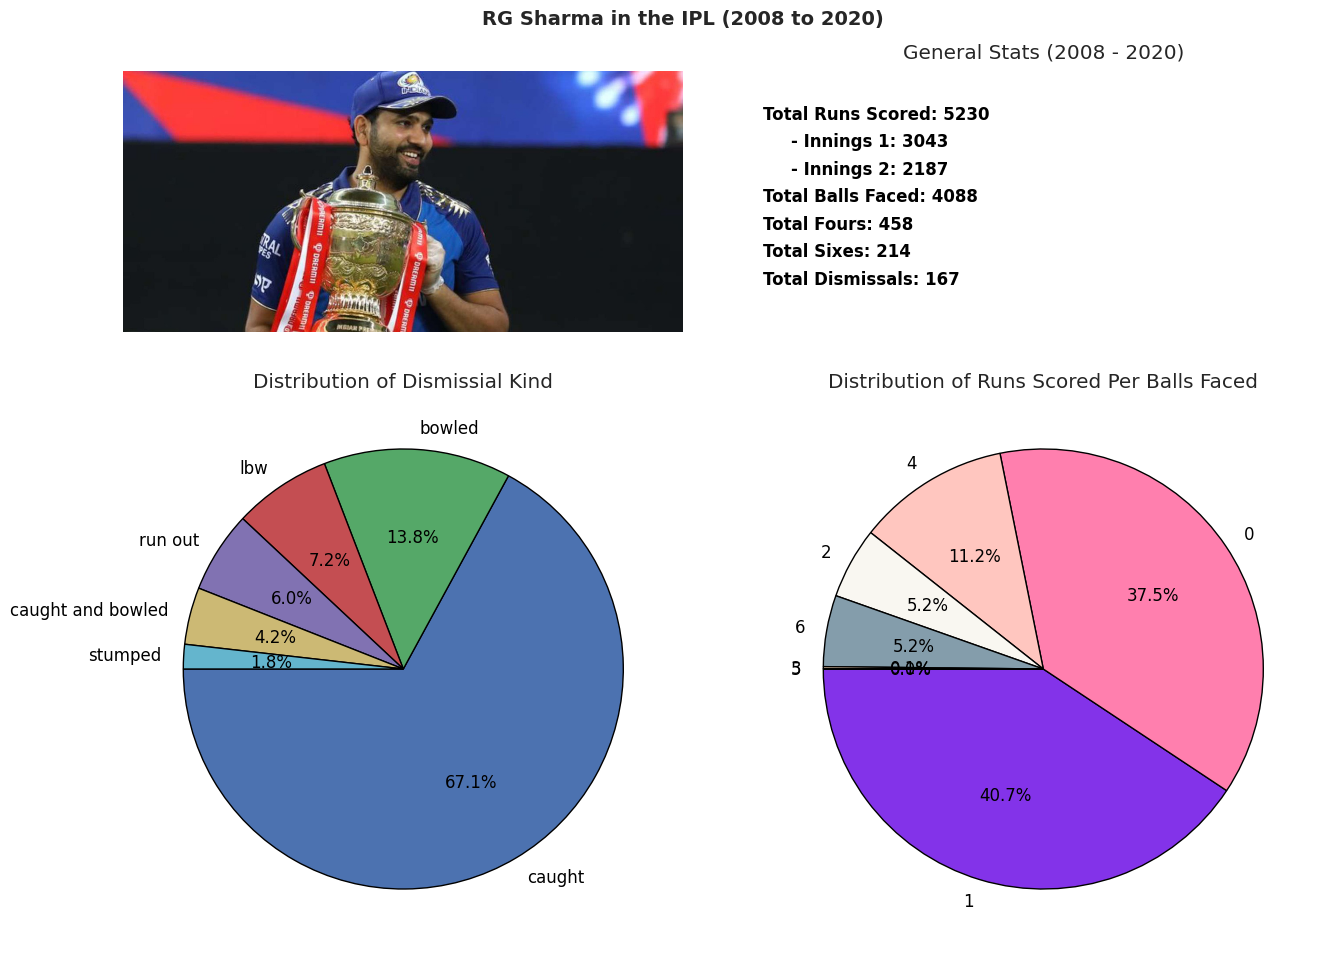

In [540]:
generatePlot("RG Sharma", "r_sharma.jpeg", ball)

- Rohit Sharma has scored no runs on 37.5% balls faced roughly ~ 1533 dot balls faced 
- Almost 16.5% of balls faced by him are boundaries
- Want to get him out? Get him caught !!!
- Scores more runs while batting first
- Most dismissed player in th IPL

### MS Dhoni

<Figure size 800x550 with 0 Axes>

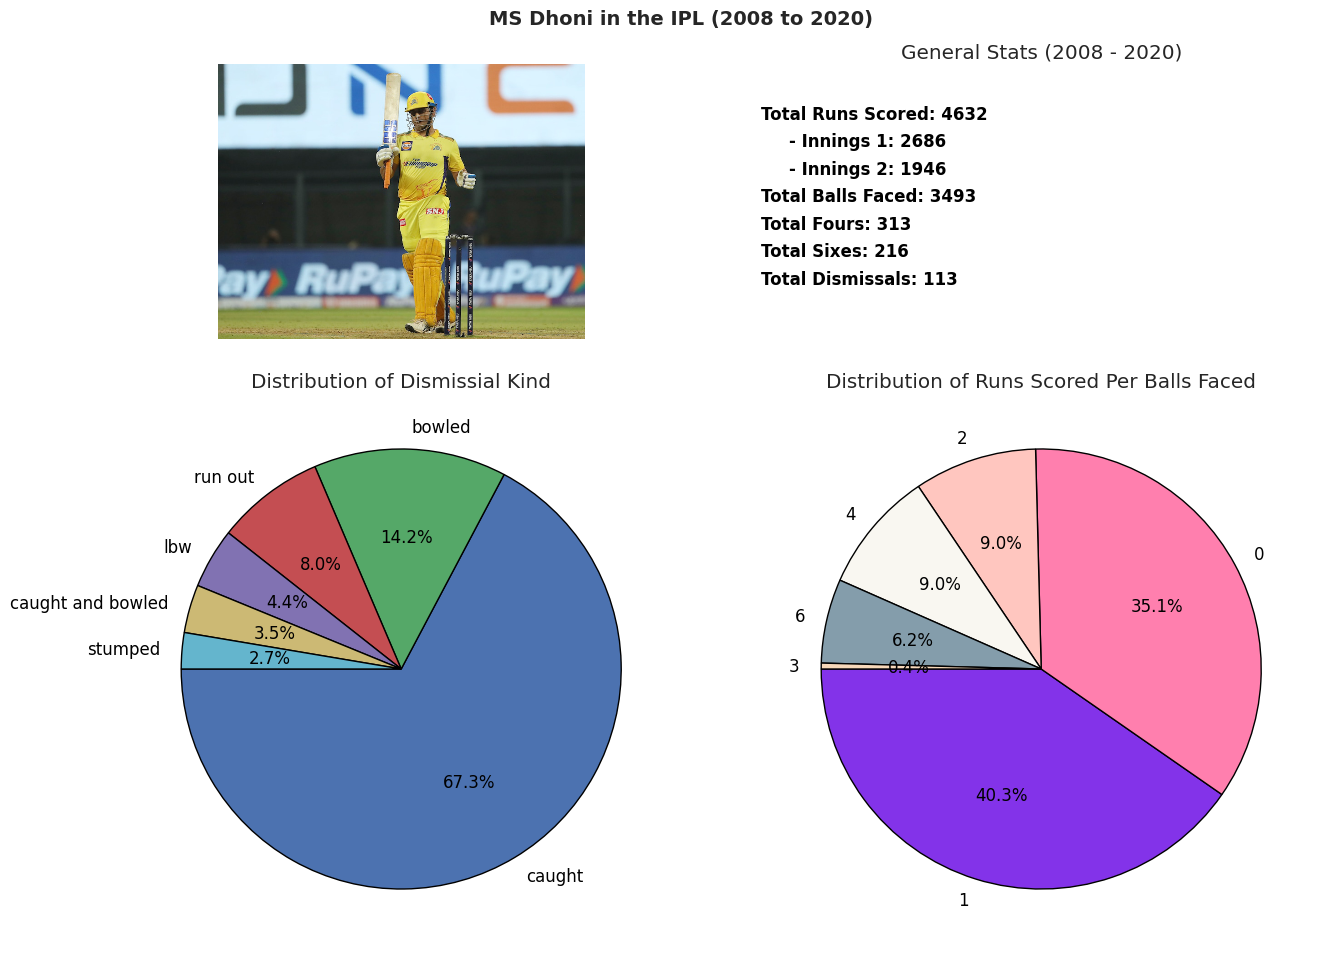

In [541]:
generatePlot("MS Dhoni", "dhoni.jpeg", ball)

- MS Dhoni has scored no runs on 35.1% balls faced roughly ~ 1227 dot balls faced 
- Almost 50% of the balls he faces are singles, doubles and triple 
- Similarly, we see MSD scores majority of his runs in the first innings
- Even MSD get caught out more often

### Chris Gayle

<Figure size 800x550 with 0 Axes>

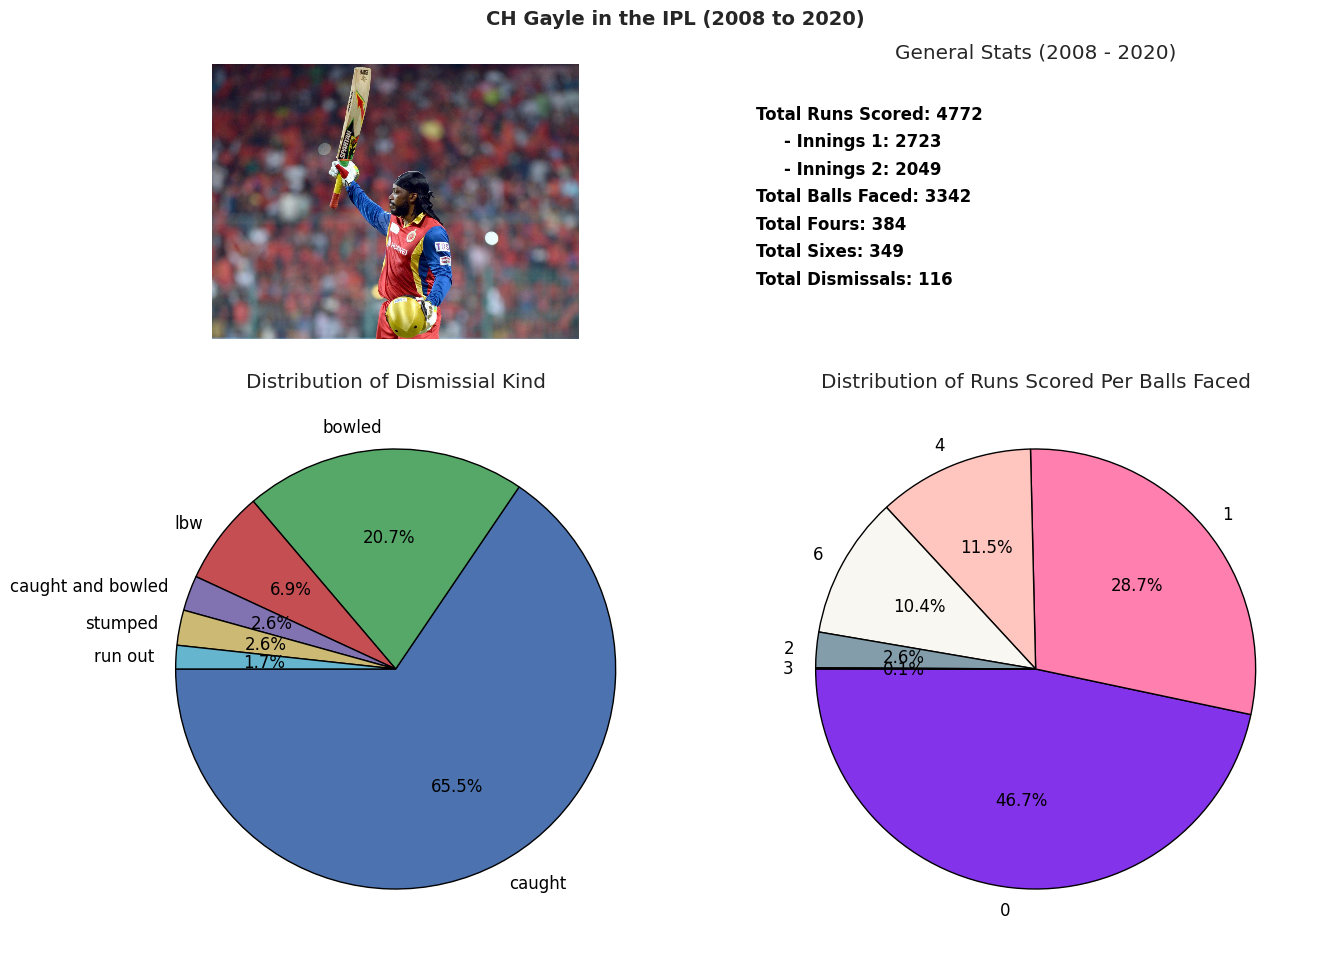

In [542]:
generatePlot("CH Gayle", "gayle.jpeg", ball)

- Chris Gayle, tends to play a lot of dot balls, but gurantees boundaries
- The number of sixes are !!!! at 349 he is way ahead than any other player
- Almost 22% of the balls faced by him are hit for boundaries
- Like the rest even he gets caught more often
- Surprisingly he gets run out only 1.7% of the times he comes out to bat, knowing that he is not that good running between the wickets

### AB de Villiers

<Figure size 800x550 with 0 Axes>

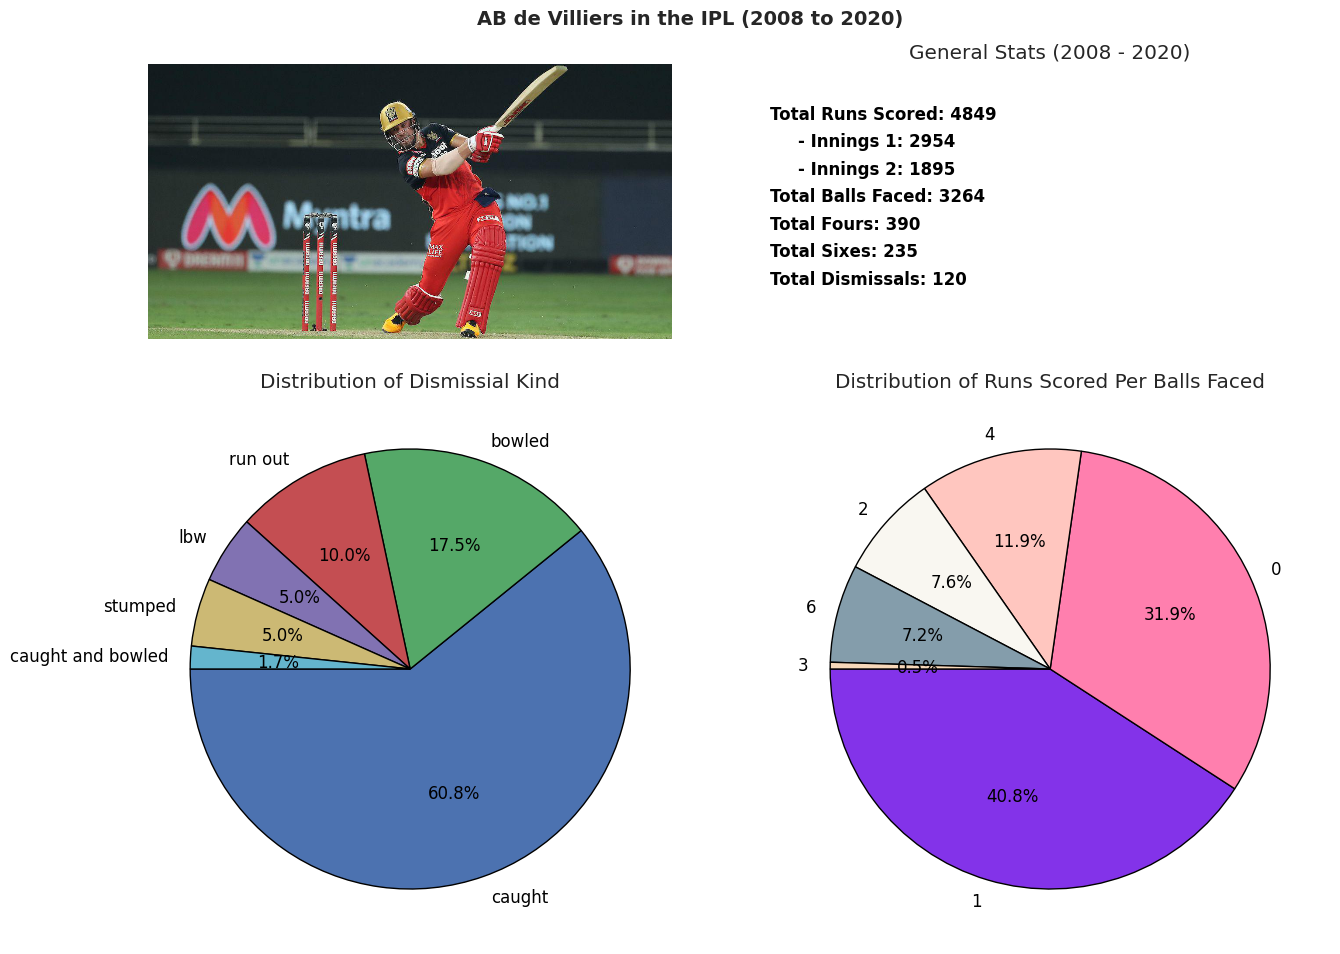

In [543]:
generatePlot("AB de Villiers", "abd.jpeg", ball)

- ABD plays the least dot balls among the one's seen
- Almost 20% of the balls faced by him are hit for boundaries
- Good at strike rotation too
- Even he gets caught out more often as seen with the trend

### Some General Stats

#### Top 5 players most balls faced

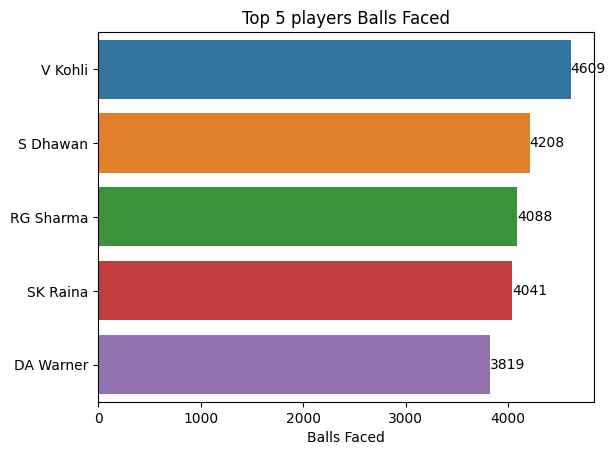

In [544]:
x = ball["batsman"].value_counts().sort_values(ascending=False)[:5].values
y = ball["batsman"].value_counts().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
ax.set_title("Top 5 players Balls Faced")
ax.set_xlabel("Balls Faced");

#### Top 5 run scorrers

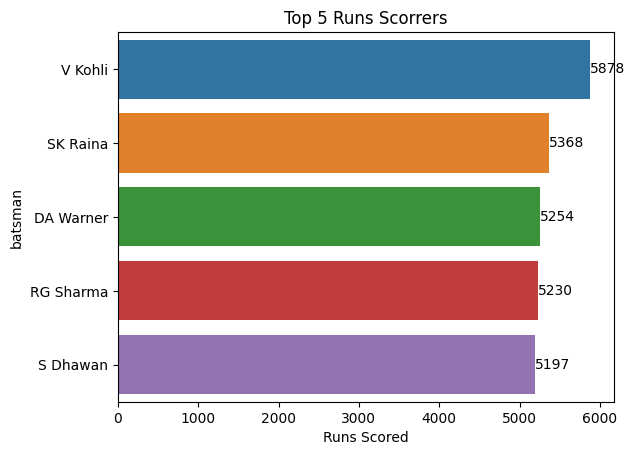

In [545]:
x = ball.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)[:5].values
y = ball.groupby("batsman")["batsman_runs"].sum(
).sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.set_xlabel("Runs Scored")
ax.set_title("Top 5 Runs Scorrers")
ax.bar_label(ax.containers[0]);


#### Top Run Scorrers in Power Play (1-6)

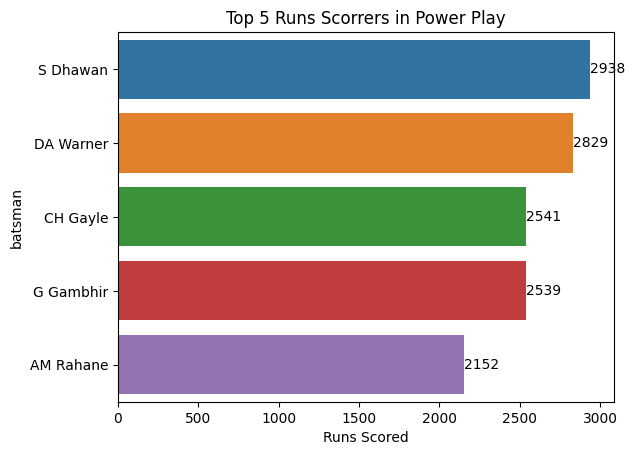

In [546]:
x = ball[ball["over"] <= 6].groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)[:5].values
y = ball[ball["over"] <= 6].groupby(
    "batsman")["batsman_runs"].sum().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.set_xlabel("Runs Scored")
ax.set_title("Top 5 Runs Scorrers in Power Play")
ax.bar_label(ax.containers[0]);

#### Top Run scorrers in Death Overs


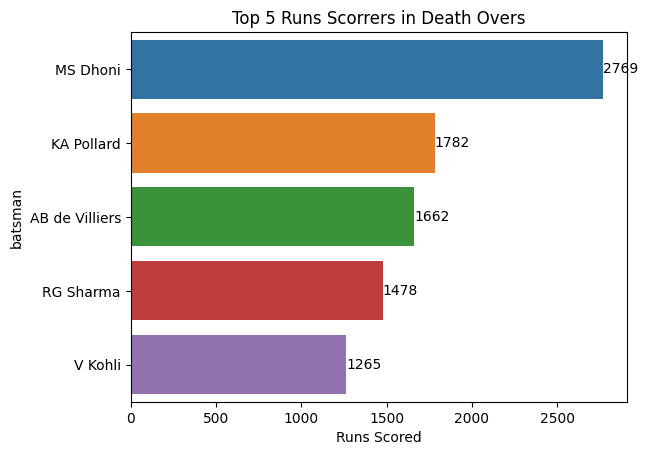

In [547]:
x = ball[ball["over"] >= 15].groupby(
    "batsman")["batsman_runs"].sum().sort_values(ascending=False)[:5].values
y = ball[ball["over"] >= 15].groupby(
    "batsman")["batsman_runs"].sum().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.set_xlabel("Runs Scored")
ax.set_title("Top 5 Runs Scorrers in Death Overs")
ax.bar_label(ax.containers[0]);

#### Top 5 Run scorrers in middle overs (6 -15)

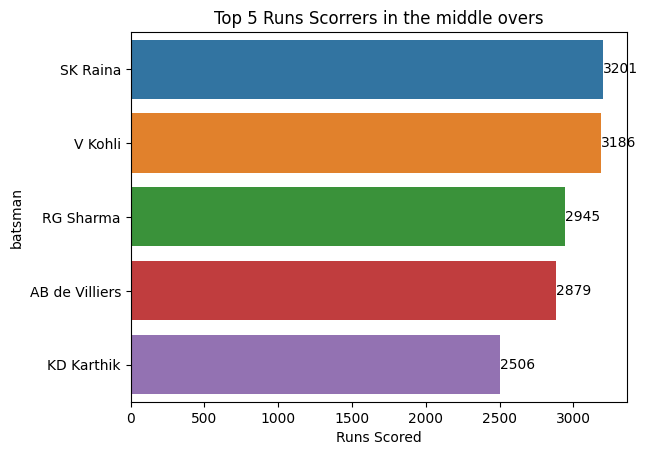

In [548]:
x = ball[ball["over"].between(6,15)].groupby(
    "batsman")["batsman_runs"].sum().sort_values(ascending=False)[:5].values
y = ball[ball["over"].between(6,15)].groupby(
    "batsman")["batsman_runs"].sum().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.set_xlabel("Runs Scored")
ax.set_title("Top 5 Runs Scorrers in the middle overs")
ax.bar_label(ax.containers[0]);

#### Top 5 six hitters

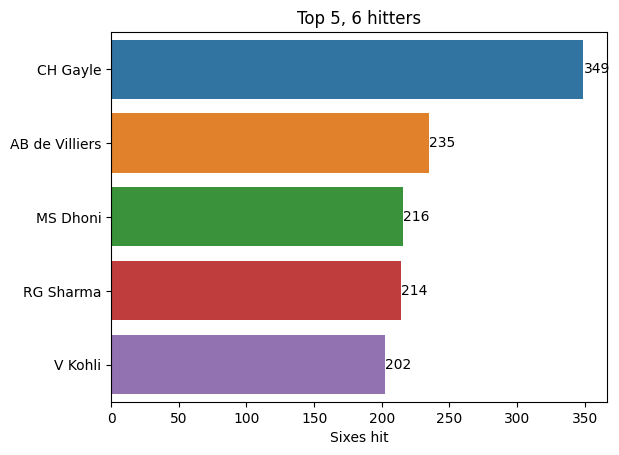

In [549]:
all_batsman = ball.batsman.unique()
sixes = {}
fours = {}

for batsman in all_batsman:
    temp = pd.DataFrame(ball[ball["batsman"] == batsman]["batsman_runs"])
    try:
        sixes[batsman] = temp.batsman_runs.value_counts()[6]
        fours[batsman] = temp.batsman_runs.value_counts()[4]
    except:
        sixes[batsman] = 0
        fours[batsman] = 0

six_hitters = sorted(sixes.items(), key=lambda x: x[1], reverse=True)[:5]
ax = sns.barplot(x=[val[1] for val in six_hitters], y=[val[0]
                 for val in six_hitters])
ax.bar_label(ax.containers[0])
ax.set_title("Top 5, 6 hitters")
ax.set_xlabel("Sixes hit");


#### Top 5 four hitters

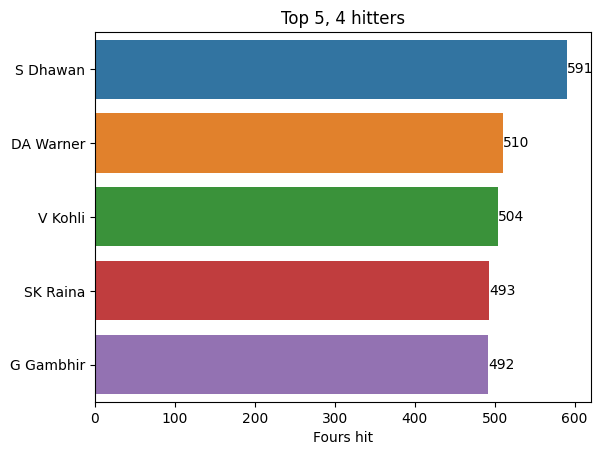

In [550]:
four_hitters = sorted(fours.items(), key=lambda x: x[1], reverse=True)[:5]
ax = sns.barplot(x=[val[1] for val in four_hitters], y=[val[0]
                 for val in four_hitters])
ax.bar_label(ax.containers[0])
ax.set_title("Top 5, 4 hitters")
ax.set_xlabel("Fours hit");


#### Top 5 dismissed players

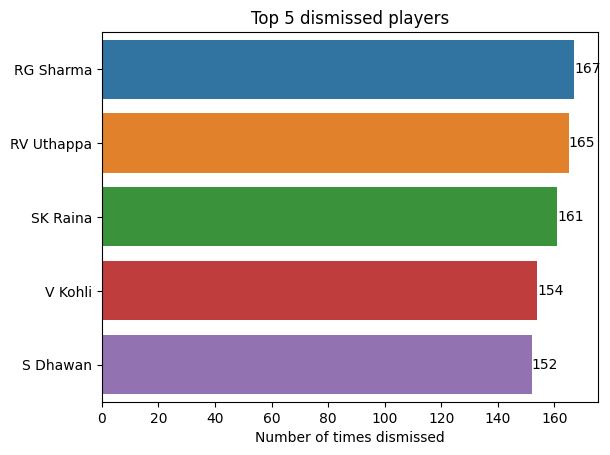

In [551]:
x = ball.player_dismissed.value_counts().sort_values(ascending=False)[:5].values
y = ball.player_dismissed.value_counts().sort_values(ascending=False)[
    :5].index
ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
ax.set_title("Top 5 dismissed players")
ax.set_xlabel("Number of times dismissed");


#### Most balls bowled

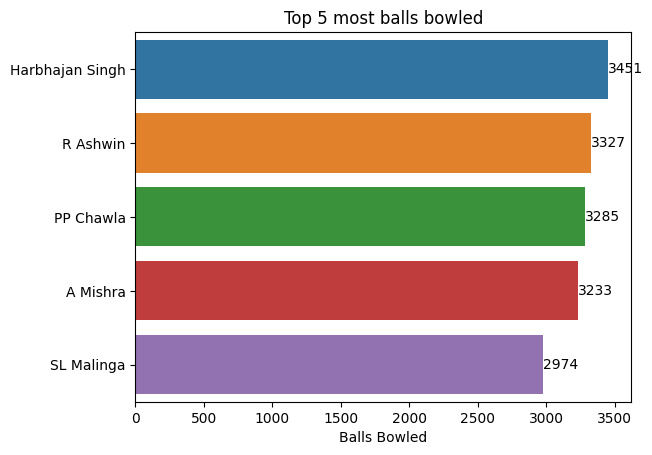

In [552]:

x = ball.bowler.value_counts().sort_values(ascending=False)[:5].values
y=ball.bowler.value_counts().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
ax.set_title("Top 5 most balls bowled")
ax.set_xlabel("Balls Bowled");

- Top 4 bowlers are all spinners

#### Top 5 Wicket Takers

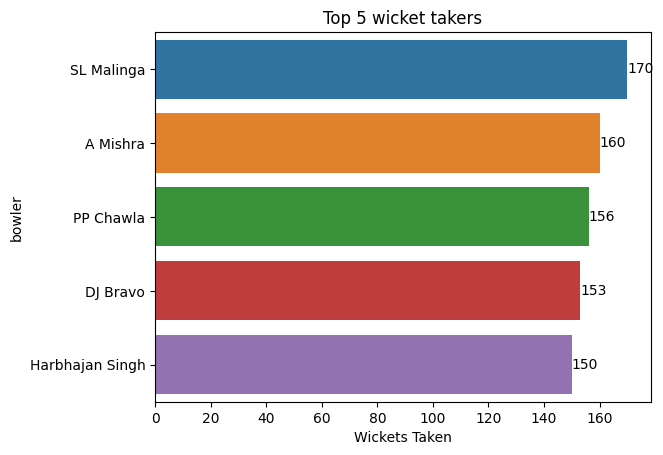

In [553]:
x = ball[(ball["is_wicket"] == 1) & (ball["dismissal_kind"] != "run out")].groupby("bowler")["is_wicket"].sum().sort_values(ascending=False)[:5].values
y = ball[(ball["is_wicket"] == 1) & (ball["dismissal_kind"] != "run out")].groupby(
    "bowler")["is_wicket"].sum().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
ax.set_title("Top 5 wicket takers")
ax.set_xlabel("Wickets Taken");

- 3 Spinners and 2 Fast bowlers

#### Top 5 wicket takers in the power play overs (1-6)

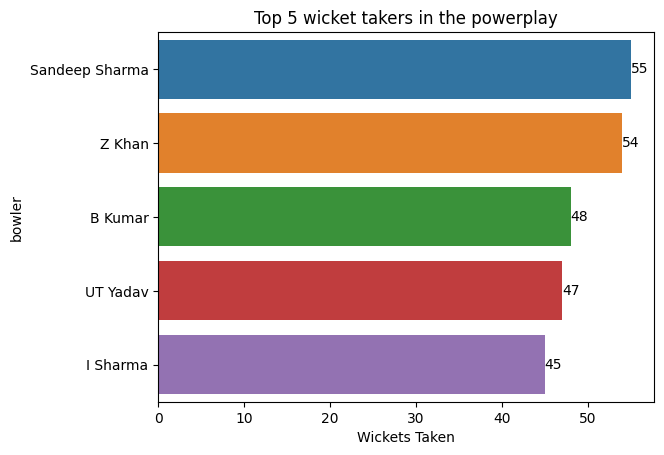

In [554]:
x = ball[(ball["is_wicket"] == 1) & (ball["dismissal_kind"] != "run out") & (ball["over"] <= 6)].groupby(
    "bowler")["is_wicket"].sum().sort_values(ascending=False)[:5].values
y = ball[(ball["is_wicket"] == 1) & (ball["dismissal_kind"] != "run out") & (ball["over"] <= 6)].groupby(
    "bowler")["is_wicket"].sum().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
ax.set_title("Top 5 wicket takers in the powerplay")
ax.set_xlabel("Wickets Taken");

- All these are fast bowlers

#### Top 5 wicket takers in the death overs (15 - 20)

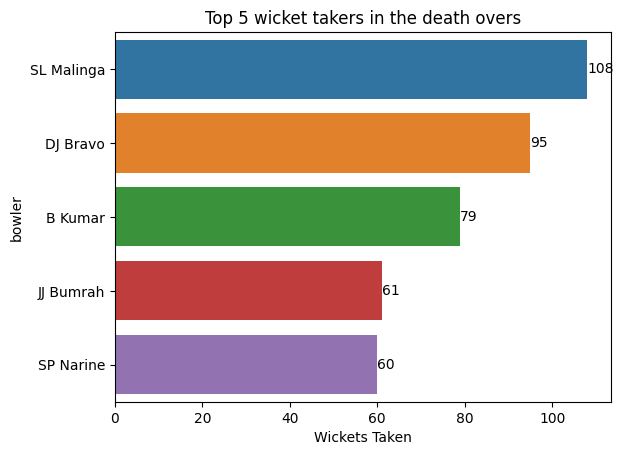

In [555]:
x = ball[(ball["is_wicket"] == 1) & (ball["dismissal_kind"] != "run out") & (ball["over"] >= 15)].groupby(
    "bowler")["is_wicket"].sum().sort_values(ascending=False)[:5].values
y = ball[(ball["is_wicket"] == 1) & (ball["dismissal_kind"] != "run out") & (ball["over"] >= 15 )].groupby(
    "bowler")["is_wicket"].sum().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
ax.set_title("Top 5 wicket takers in the death overs")
ax.set_xlabel("Wickets Taken");

- Sunil Narine is the only spinner in this list, the rest are all fast bowlers

#### Top 5 Wicket takers in the middle overs

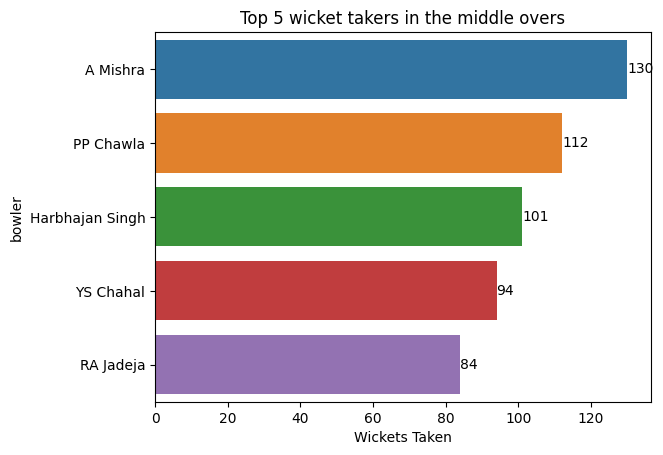

In [556]:
x = ball[(ball["is_wicket"] == 1) & (ball["dismissal_kind"] != "run out") & (ball["over"].between(6,15))].groupby(
    "bowler")["is_wicket"].sum().sort_values(ascending=False)[:5].values
y = ball[(ball["is_wicket"] == 1) & (ball["dismissal_kind"] != "run out") & (ball["over"].between(6,15))].groupby(
    "bowler")["is_wicket"].sum().sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
ax.set_title("Top 5 wicket takers in the middle overs")
ax.set_xlabel("Wickets Taken");

- We see that all these players are spineers

#### Top 5 Man of the Match Awards

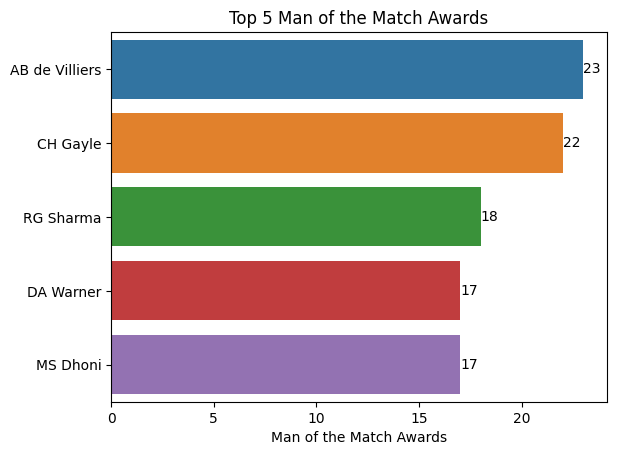

In [557]:
x = matches.player_of_match.value_counts().sort_values(ascending=False)[:5].values
y = matches.player_of_match.value_counts(
).sort_values(ascending=False)[:5].index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
ax.set_title("Top 5 Man of the Match Awards")
ax.set_xlabel("Man of the Match Awards");

- All these players are batsman

### Lets look at the Matches

#### Matches hosted by each city

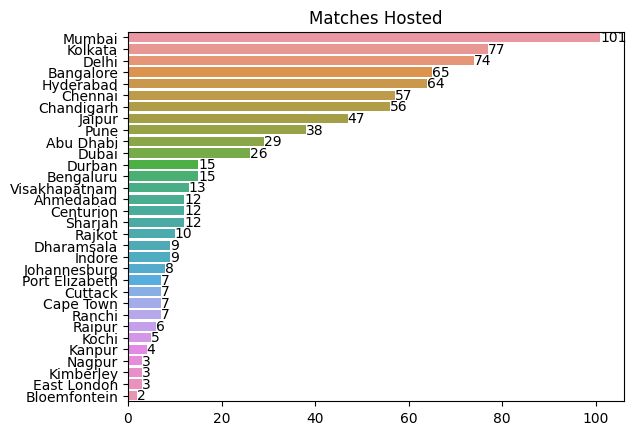

In [558]:
x = matches["city"].value_counts().values
y = matches["city"].value_counts().index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
plt.title("Matches Hosted");

#### Matches won by each team

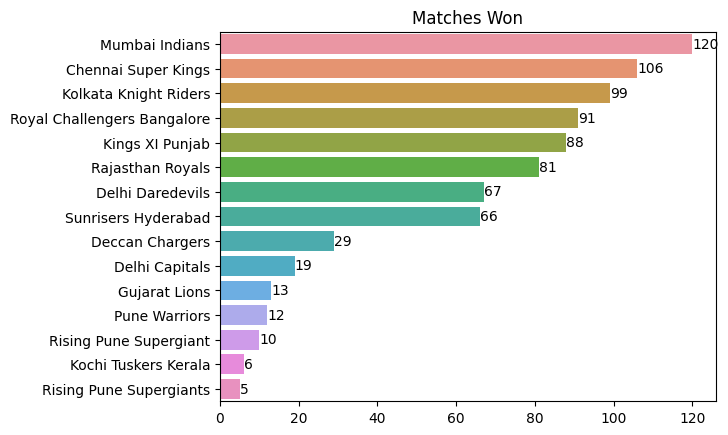

In [559]:
x = matches["winner"].value_counts().values
y = matches["winner"].value_counts().index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
plt.title("Matches Won");

#### Toss won by each team

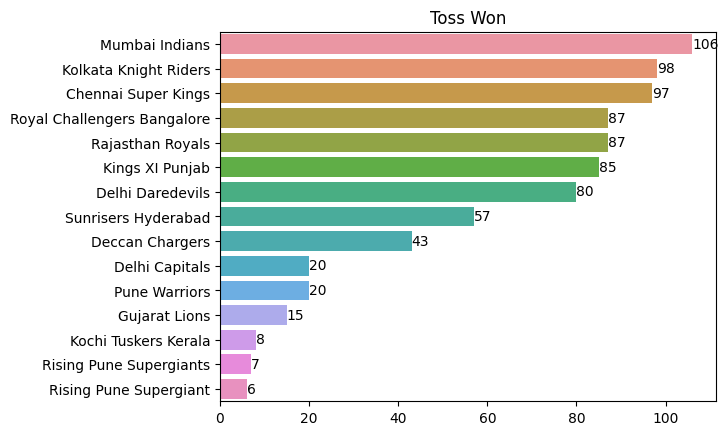

In [560]:
x = matches["toss_winner"].value_counts().values
y = matches["toss_winner"].value_counts().index

ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
plt.title("Toss Won");

#### Toss Winner is a Match Winner ????

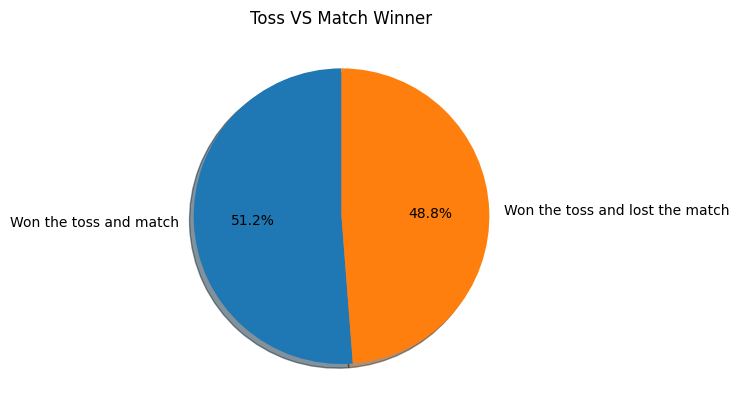

In [561]:
toss_and_match = matches[matches["toss_winner"]  == matches["winner"]].shape[0]
pie_data = [toss_and_match, matches.shape[0] - toss_and_match]
plt.pie(pie_data, labels=["Won the toss and match", "Won the toss and lost the match"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Toss VS Match Winner");

- Winning the toss, does not make a significant difference in the outcome of the game

#### Teams Won batting 1st vs batting 2nd

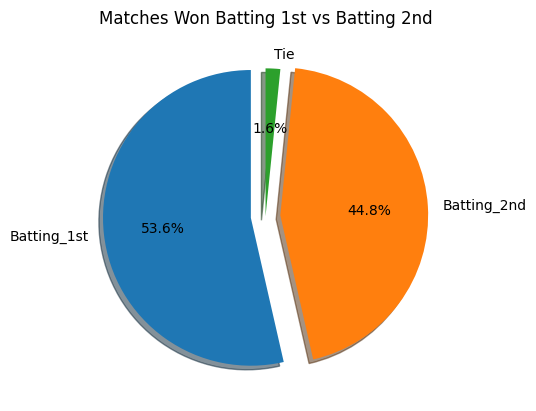

In [562]:
values = matches["result"].value_counts().sort_values(ascending=False)
labels = "Batting_1st Batting_2nd Tie".split(" ")
plt.title("Matches Won Batting 1st vs Batting 2nd")
plt.pie(values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90, explode=[.1,0.1,0]);

#### What do captains do after winning the toss ?

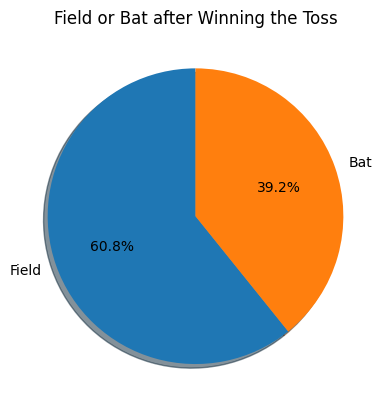

In [563]:
values = matches["toss_decision"].value_counts().sort_values(ascending=False)
labels = "Field Bat".split(" ")
plt.title("Field or Bat after Winning the Toss")
plt.pie(values, labels=labels, autopct="%1.1f%%",
        shadow=True, startangle=90);